In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load the dataset
Data = pd.read_csv(r"C:\Users\hp\Desktop\Assigment\KNN\KNN\Zoo.csv")

#Display the first Few rows of dataset
Data.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
Data.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [ ]:
#Here we can see that 5 types means 5 classes are present in our dataset.

# 1. Analyse the data using the visualizations

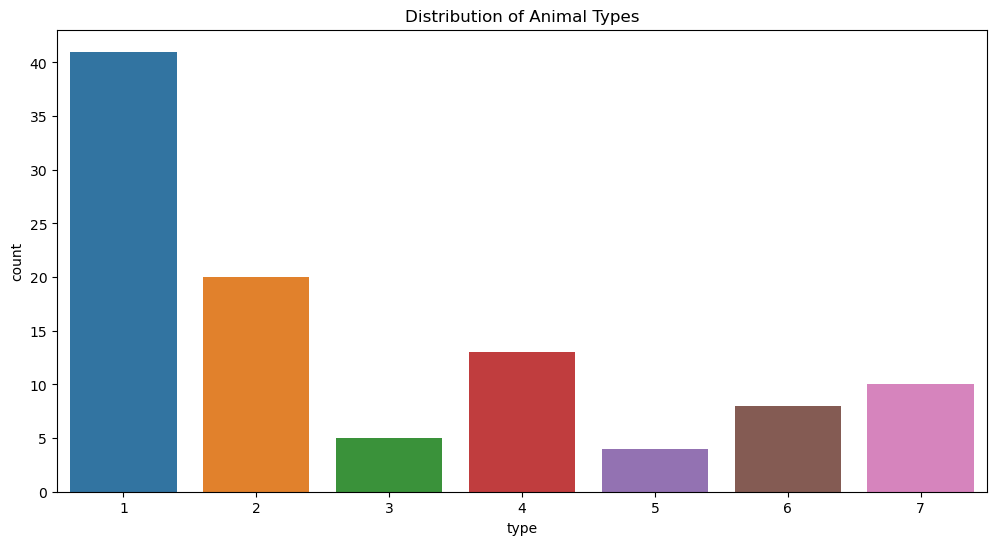

In [11]:
#Ploting graph on basis of Type
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=Data)
plt.title('Distribution of Animal Types')
plt.show()

# 2. Preprocess the data by handling missing values & Outliers, if any.

In [12]:
#Check missing value in dataset:
Data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [13]:
# Since there are no missing values in the provided dataset, we can move on to outliers if necessary

In [14]:
#Checking Outlier:
Data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [21]:
#Describe data to identify potential outliers
Description= Data.describe()
print(f"Desription:")
print(Description)

# Calculate IQR to detect outliers
Q1 = Data['type'].quantile(0.25)
Q3 = Data['type'].quantile(0.75)

IQR= Q3-Q1
print(f"IQR:{IQR}")

# Outlier detection
Outlier = Data[(Data['type'] < (Q1 - 1.5 * IQR)) | (Data['type']> (Q3 + 1.5 * IQR))]

Num_outlier = len(Outlier)
print(f"Number of outlier: {Num_outlier}")


Desription:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.4995

In [22]:
#No Outlier is present in this dataset.

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [23]:
#imoprting nessesary library to split dataset:
from sklearn.model_selection import train_test_split,cross_val_score

In [27]:
X = Data.drop(columns=['animal name', 'type'])
y = Data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
89     0         0     1     0         0        1         0        1   
26     0         0     1     0         0        1         1        1   
42     0         0     1     0         1        0         1        0   
70     1         0     0     1         0        0         0        1   
15     0         0     1     0         0        1         1        0   
..   ...       ...   ...   ...       ...      ...       ...      ...   
60     0         0     1     0         0        1         1        1   
71     0         1     1     0         0        0         1        0   
14     0         0     1     0         0        1         1        0   
92     0         0     1     0         0        1         1        1   
51     1         0     1     0         1        0         0        0   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
89         1         1         0     0     4     0         0   

# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [28]:
# 4. Implement the KNN algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  # We'll start with k=5
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# 5. Choose an appropriate distance metric and value for K.

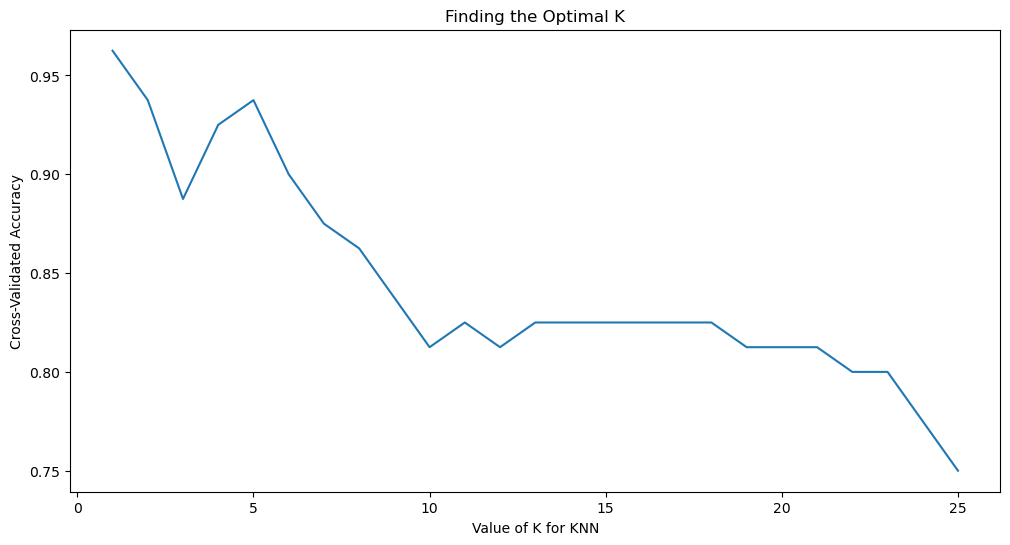

The optimal number of neighbors is 1


KNeighborsClassifier(n_neighbors=1)

In [29]:
# 5. Choose an appropriate distance metric and value for K
# Using Euclidean distance (default in scikit-learn)

# Find the optimal k using cross-validation
k_range = range(1, 26)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the k values and their cross-validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal K')
plt.show()

# Choose the best K
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal number of neighbors is {optimal_k}')

# Train the model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

In [30]:
#The optimal number of neighbors is 1

# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [32]:
# 6. Evaluate the classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')

print(classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.9523809523809523
Recall: 0.9523809523809523
F1-Score: 0.9523809523809523
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



# 7. Visualize the decision boundaries of the classifier.

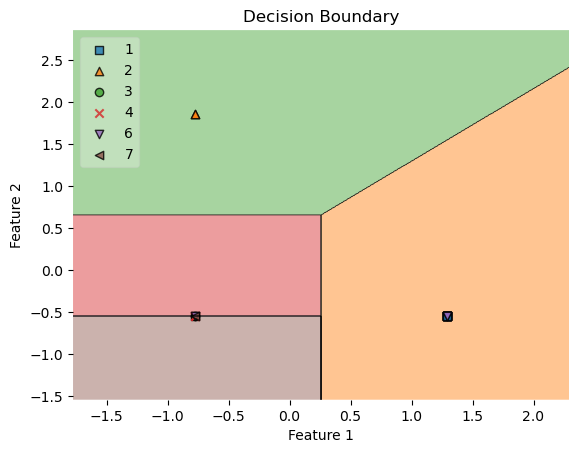

In [35]:
# 7. Visualize decision boundaries
# Note: Visualizing decision boundaries works best with 2D data.
# We'll use the first two features for this purpose.
# However, for visualization, we'll train a new KNN classifier on the reduced feature set
from mlxtend.plotting import plot_decision_regions
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_scaled[:, :2], y_train) # Train on the first two features

plot_decision_regions(X_test_scaled[:, :2], y_test.values, clf=knn_2d, legend=2) # Use the new classifier
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()